In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

NameError: name 'train_images' is not defined

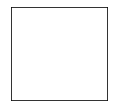

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
model = models.Sequential()
model.add( layers.Conv2D(32,(1,1),activation='relu',input_shape=(32,32,3)) )
# model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(3,(1,1),activation='relu') )

model.summary()

2022-11-24 18:58:35.719512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 18:58:35.762080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 18:58:35.762407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 18:58:35.763910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

KeyboardInterrupt: 

In [6]:
# train_output_images = np.gradient(train_images,axis=2)
train_output_images = np.tanh(10 * train_images )

In [7]:
model.compile( optimizer='adam',loss=losses.MeanSquaredError() )
history = model.fit( train_images , train_output_images , epochs=1 )

2022-11-24 18:39:56.994198: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-11-24 18:39:57.782535: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-11-24 18:39:58.203202: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-11-24 18:39:58.478954: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-11-24 18:40:00.039330: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1563/1563 [==============================] - 6s 2ms/step - loss: 0.0054


In [8]:
Predicted_images = model.predict( train_images )

2022-11-24 18:40:05.623083: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 2s 1ms/step


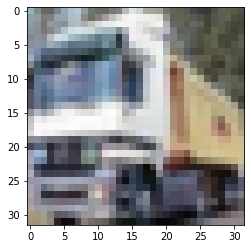

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


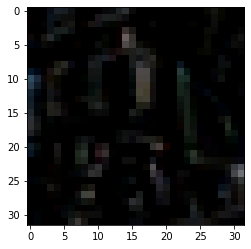

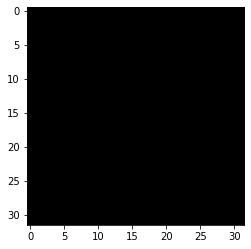

In [9]:
plt.imshow( train_images[1] )
plt.show()

plt.imshow( train_output_images[1] )
plt.show()

plt.imshow( Predicted_images[1] )
plt.show()